#TASK #1: UNDERSTAND THE PROBLEM STATEMENT & BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1U3eRNUYyza1A7EFopacJyujR87Vm_ae8)


![alt text](https://drive.google.com/uc?id=139zlnLGzYen-GbcnkXQZs44tf7OqV8e4)

https://builtin.com/artificial-intelligence/ai-trading-stock-market-tech

In [1]:
# Environment preparation
import sys
!pip install expectexception

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Preparing environment
import expectexception

# %%expect_exception TypeError

In [3]:
!ls sample_data/

anscombe.json		      mnist_test.csv	     stocks.csv
california_housing_test.csv   mnist_train_small.csv  stock_volume.csv
california_housing_train.csv  README.md


#TASK #2: IMPORT DATASETS AND LIBRARIES


In [4]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

from pandas.core.dtypes.api import is_numeric_dtype

# Set format for float values
pd.options.display.float_format = '{:,.4f}'.format

In [6]:
# Read stock prices data
stock_price_df = pd.read_csv('sample_data/stocks.csv')

# Sort the data based on Date
stock_price_df.sort_values(by='Date', inplace=True)
stock_price_df.set_index('Date', inplace=True)
stock_price_df

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.1986,75.5100,30.1200,12.1300,175.9300,180.5500,28.2500,313.6444,"1,295.5000"
2012-01-13,59.9729,74.6000,30.0700,12.3500,178.4200,179.1600,22.7900,311.3281,"1,289.0900"
2012-01-17,60.6714,75.2400,30.2500,12.2500,181.6600,180.0000,26.6000,313.1164,"1,293.6700"
2012-01-18,61.3014,75.0600,30.3300,12.7300,189.4400,181.0700,26.8100,315.2733,"1,308.0400"
2012-01-19,61.1071,75.5600,30.4200,12.8000,194.4500,180.5200,26.7600,318.5909,"1,314.5000"
...,...,...,...,...,...,...,...,...,...
2020-08-05,440.2500,174.2800,29.8500,16.7200,"3,205.0300",125.4500,"1,485.0200","1,473.6100","3,327.7700"
2020-08-06,455.6100,172.2000,29.8400,18.4600,"3,225.0000",126.1200,"1,489.5800","1,500.1000","3,349.1599"
2020-08-07,444.4500,170.0200,30.0200,19.0300,"3,167.4600",124.9600,"1,452.7100","1,494.4900","3,351.2800"


In [7]:
# Read the stocks volume data
stock_vol_df = pd.read_csv("sample_data/stock_volume.csv")

# Sort the volume data based on Date
stock_vol_df.sort_values(by='Date', inplace=True)
stock_vol_df.set_index('Date', inplace=True)
stock_vol_df

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...
2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000


In [8]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [9]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [10]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 2012-01-12 to 2020-08-11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 168.7+ KB


In [11]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 2012-01-12 to 2020-08-11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AAPL    2159 non-null   int64
 1   BA      2159 non-null   int64
 2   T       2159 non-null   int64
 3   MGM     2159 non-null   int64
 4   AMZN    2159 non-null   int64
 5   IBM     2159 non-null   int64
 6   TSLA    2159 non-null   int64
 7   GOOG    2159 non-null   int64
 8   sp500   2159 non-null   int64
dtypes: int64(9)
memory usage: 168.7+ KB


**MINI CHALLENGE #1:**
- **What is the average trading volume for Apple stock?**
- **What is the maximum trading volume for sp500?**
- **Which security is traded the most? comment on your answer**
- **What is the average stock price of the S&P500 over the specified time period?**
- **What is the maximum price of Tesla Stock?**


In [12]:
print(f'The average trading volume for Apple stocks is {stock_vol_df.AAPL.mean():,.2f}')
print(f'The maximum trading volume for sp500 is {stock_vol_df.sp500.max():,.2f}')
print(f'''
The most traded security is {stock_vol_df.mean().idxmax()}
{stock_vol_df.mean().sort_values(ascending=False)}
{stock_vol_df.describe()}
''')
print(f'The average stock price of the sp500 over the specified time period is {stock_price_df.sp500.mean():,.2f}')
print(f'The maximum price of Tesla stock is {stock_price_df.TSLA.max()}')

The average trading volume for Apple stocks is 58,203,317.42
The maximum trading volume for sp500 is 9,044,690,000.00

The most traded security is sp500
sp500   3,680,732,468.7355
AAPL       58,203,317.4155
T          28,321,313.5711
MGM         9,845,581.7045
TSLA        7,001,302.2696
BA          6,419,915.9333
IBM         4,453,089.5322
AMZN        4,102,672.9041
GOOG        2,498,238.2585
dtype: float64
                  AAPL               BA                T             MGM  \
count       2,159.0000       2,159.0000       2,159.0000      2,159.0000   
mean   58,203,317.4155   6,419,915.9333  28,321,313.5711  9,845,581.7045   
std    45,681,411.9012   9,711,873.1540  14,289,105.8976  7,295,752.6435   
min    11,362,000.0000     788,900.0000   6,862,400.0000    950,700.0000   
25%    27,699,300.0000   3,031,850.0000  20,021,500.0000  5,796,450.0000   
50%    42,094,200.0000   3,991,000.0000  24,859,300.0000  7,899,800.0000   
75%    71,824,800.0000   5,325,900.0000  32,105,650.0000 

#TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [13]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  return df.apply(lambda col: col/col[0] if is_numeric_dtype(col) else col)

In [14]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(df, title = title)
  fig.update_layout(legend_title_text = None)
  fig.show()

In [15]:
# plot interactive chart for stocks data
interactive_plot(stock_price_df, 'Stock Prices')

**MINI CHALLENGE #2:**
- **Plot the volume dataset for all stocks, list any observations you might see.**
- **Plot the normalized stock prices and volume dataset.**

In [16]:
# Plot the volume dataset for all stocks, list any observations you might see.
interactive_plot(stock_vol_df, 'Stock Volume')

In [17]:
# Plot the normalized stock prices.
interactive_plot(normalize(stock_price_df), 'Stock Prices (Normalized data)')

In [18]:
# Plot the normalized volume dataset.
interactive_plot(normalize(stock_vol_df), 'Stock Volume (Normalized data)')

# TASK #4: PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL

![alt text](https://drive.google.com/uc?id=1uXYYHfgeJyncu4BZRAooTC4iCclH9e9B)

In [19]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame(data={'Close': price_df[name], 'Volume': vol_df[name]},
                        index=price_df.index)

In [20]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(df, window_period = 1):
  # Create a column containing the prices for the next 1 days
  df['Target'] = df[['Close']].shift(-window_period)
  
  # Remove the last row as it will be a null value
  df.dropna(inplace=True)

  # return the new dataset 
  return df

In [21]:
# Function to scale and split the data 
from sklearn.preprocessing import MinMaxScaler

def scaling_and_splitting_data(df, split_percent):
  sc = MinMaxScaler(feature_range = (0, 1))
  data = sc.fit_transform(df)

  # Creating Feature and Target
  X = data[:,:2]
  y = data[:,2]

  # Spliting the data this way, since order is important in time-series
  # Note that we did not use train test split with it's default settings since it shuffles the data
  split = int(split_percent * len(X))
  X_train = X[:split]
  y_train = y[:split]
  X_test = X[split:]
  y_test = y[split:]

  return X, y, X_train, y_train, X_test, y_test

In [22]:
# Define a data plotting function
def show_plot(data, title, legend=['Close Price', 'Volume']):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.legend(legend)
  plt.grid()

In [23]:
# Let's test the functions and get individual stock prices and volumes for AAPL
stock_name = 'AAPL'
price_volume_target_df = trading_window(individual_stock(stock_price_df, stock_vol_df, stock_name))
price_volume_target_df

,Close,Volume,Target
Date,,,
2012-01-12,60.1986,53146800,59.9729
2012-01-13,59.9729,56505400,60.6714
2012-01-17,60.6714,60724300,61.3014
2012-01-18,61.3014,69197800,61.1071
2012-01-19,61.1071,65434600,60.0429
...,...,...,...
2020-08-04,438.6600,43267900,440.2500
2020-08-05,440.2500,30498000,455.6100
2020-08-06,455.6100,50607200,444.4500


In [24]:
X, y, X_train, y_train, X_test, y_test = scaling_and_splitting_data(price_volume_target_df, split_percent=0.65)
(X.shape, y.shape), (X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((2158, 2), (2158,)), ((1402, 2), (1402,)), ((756, 2), (756,)))

In [25]:
# Train data
X_train, y_train

(array([[0.01102638, 0.11442624],
        [0.01046185, 0.12362365],
        [0.01220906, 0.13517696],
        ...,
        [0.25161323, 0.02518813],
        [0.25766595, 0.02877662],
        [0.26084239, 0.06803417]]),
 array([0.01046185, 0.01220906, 0.01378478, ..., 0.25766595, 0.26084239,
        0.26329349]))

In [26]:
# # Test data
# X_test, y_test

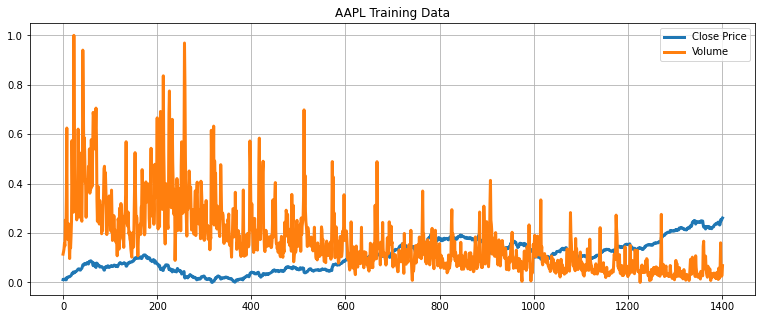

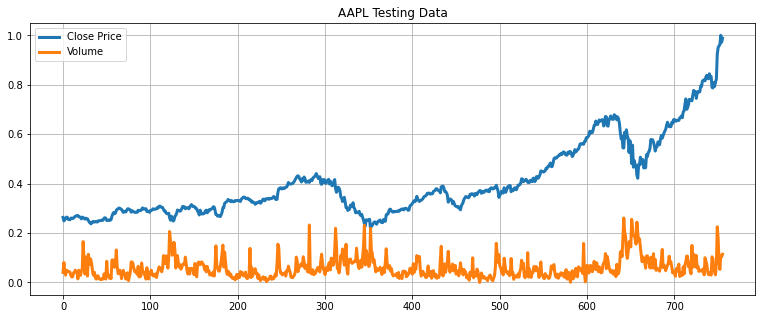

In [27]:
%matplotlib inline

show_plot(X_train, f'{stock_name} Training Data')
show_plot(X_test, f'{stock_name} Testing Data')

**MINI CHALLENGE #3:**
- **Test the created pipeline with S&P500 and Amazon datasets**

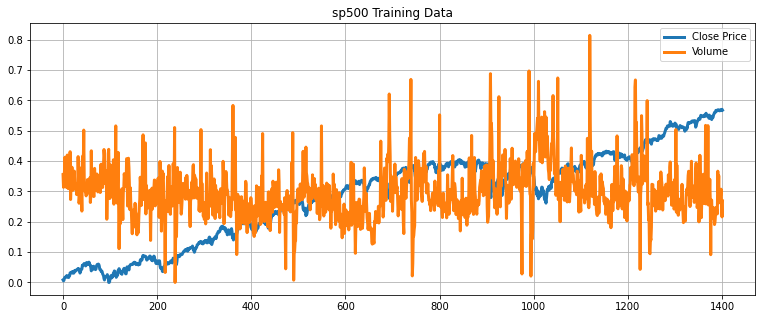

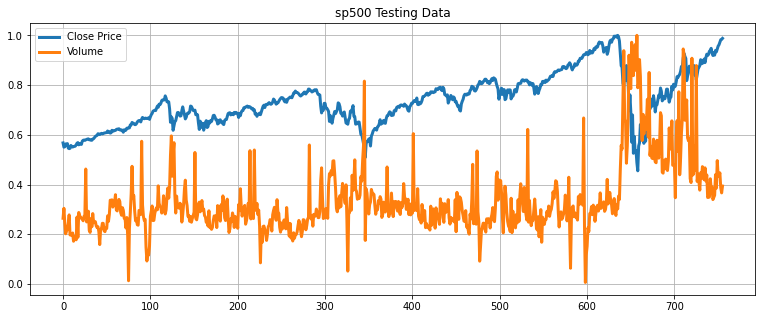

In [28]:
%matplotlib inline
# Test the created pipeline with S&P500

stock_name = 'sp500'
# (1) Get individual stock prices and volumes for stock
price_volume_target_df = trading_window(individual_stock(stock_price_df, stock_vol_df, stock_name))

# (2) Let's scale and split the data 
X, y, X_train, y_train, X_test, y_test = scaling_and_splitting_data(price_volume_target_df, split_percent=0.65)

# (3) Let's show the training and testing data
show_plot(X_train, f'{stock_name} Training Data')
show_plot(X_test, f'{stock_name} Testing Data')

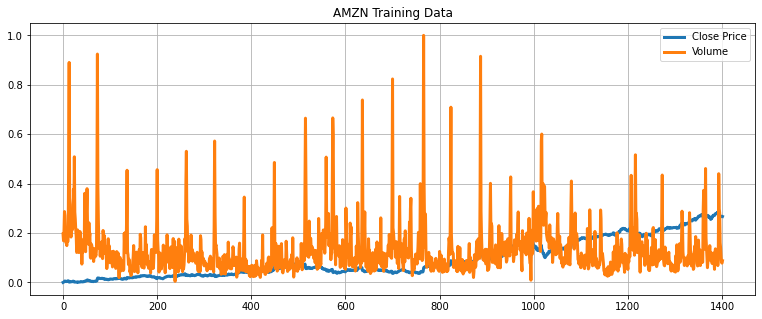

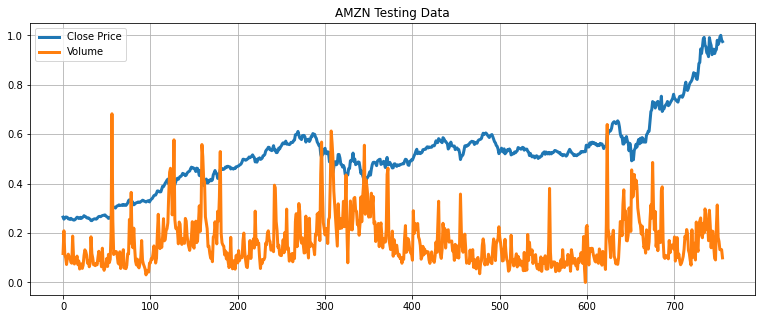

In [29]:
%matplotlib inline
# Test the created pipeline with AMZN

stock_name = 'AMZN'
# (1) Get individual stock prices and volumes for stock
price_volume_target_df = trading_window(individual_stock(stock_price_df, stock_vol_df, stock_name))

# (2) Let's scale and split the data 
X, y, X_train, y_train, X_test, y_test = scaling_and_splitting_data(price_volume_target_df, split_percent=0.65)

# (3) Let's show the training and testing data
show_plot(X_train, f'{stock_name} Training Data')
show_plot(X_test, f'{stock_name} Testing Data')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND REGRESSION 

![alt text](https://drive.google.com/uc?id=1wJHaXRzsqMi713Qkzo2IQgZTmsDxU8f7)

![alt text](https://drive.google.com/uc?id=1vDuV9M1b6KF5yIvWpiUqhI7zSr7CKk5g)

![alt text](https://drive.google.com/uc?id=1H-wED3vnYj3ZpsvK0dOEPwYGVjSVhpfI)

![alt text](https://drive.google.com/uc?id=1KM0yvHp1DjVZ87uf68yJdqj2Sh_oTLLT)

# TASK #6: UNDERSTAND THE CONCEPT OF REGULARIZATION & RIDGE REGRESSION

![alt text](https://drive.google.com/uc?id=1m9NX1aEDLAW2QCqeiQMYggnY3ovVW8QO)

![alt text](https://drive.google.com/uc?id=13Wn7UkxVkbRlIiJ-rZIrqAItfumj_wzi)

![alt text](https://drive.google.com/uc?id=1WB1wdMUYqDNAhCytmk889w9SVQQVrwlt)

![alt text](https://drive.google.com/uc?id=1IsQLtMZbKMyITX_FVr50ZkB68uUuQwmB)

![alt text](https://drive.google.com/uc?id=1D37GCrEMLdFwjTQL9WIoPEsLlEyITuX5)

![alt text](https://drive.google.com/uc?id=1IBz73HFZPUD6wTEoerXGFTJKhhZyAyb9)

# TASK #7: BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [30]:
from sklearn.linear_model import Ridge

# Let's create a function with the Ridge algorith to make predictions
def prices_ridge_predictions(X_train, y_train, X_test, y_test, X_pred, df_index, alpha=1, seed=42, verbose=True):
  # Note that Ridge regression performs linear least squares with L2 regularization.
  # Create and train the Ridge Linear Regression  Model
  model = Ridge(alpha=alpha, random_state=seed)
  model.fit(X_train, y_train)

  # Test the model and calculate its accuracy 
  lr_accuracy = model.score(X_test, y_test)
  if verbose:
    print(f"Linear Regression Score (\u03B1 = {alpha}): {lr_accuracy}")

  # Make Prediction
  predicted_prices = model.predict(X_pred)
  
  # Create a dataframe based on the dates in the individual stock data
  df_predicted = pd.DataFrame(data={'Close': X_pred[:,0],
                                    'Prediction': predicted_prices},
                                    index=df_index)
  return model, lr_accuracy, predicted_prices, df_predicted

In [31]:
%matplotlib inline
# Test the created pipeline with S&P500

stock_name = 'AAPL'
# (1) Get individual stock prices and volumes for stock
price_volume_target_df = trading_window(individual_stock(stock_price_df, stock_vol_df, stock_name))

# (2) Let's scale and split the data 
X, y, X_train, y_train, X_test, y_test = scaling_and_splitting_data(price_volume_target_df, split_percent=0.65)

# # (3) Let's show the training and testing data
# show_plot(X_train, f'{stock_name} Training Data')
# show_plot(X_test, f'{stock_name} Testing Data')

stock_name

'AAPL'

In [32]:
regression_model, lr_accuracy, predicted_prices, df_predicted = prices_ridge_predictions(X_train, y_train, 
                                                                                         X_test, y_test, 
                                                                                         X, 
                                                                                         price_volume_target_df.index)
df_predicted

Linear Regression Score (α = 1): 0.7950028030821767


,Close,Prediction
Date,,
2012-01-12,0.0110,0.0347
2012-01-13,0.0105,0.0337
2012-01-17,0.0122,0.0345
2012-01-18,0.0138,0.0346
2012-01-19,0.0133,0.0347
...,...,...
2020-08-04,0.9576,0.7783
2020-08-05,0.9616,0.7832
2020-08-06,1.0000,0.8105


In [33]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction (\u03B1 = 1)")

**MINI CHALLENGE #4:**
- **Experiment with various regularization values for alpha** 
- **What is the impact of increasing alpha?**
- **Note: default value for alpha is = 1**


In [34]:
for alpha in [1.75, 1.5, 1.25, 1, 0.75, 0.5, 0.4, 0.3, 0.2, 0.1, 0.09]:
  regression_model, lr_accuracy, predicted_prices, df_predicted = prices_ridge_predictions(X_train, y_train, 
                                                                                           X_test, y_test, 
                                                                                           X, 
                                                                                           price_volume_target_df.index,
                                                                                           alpha=alpha)
  # interactive_plot(df_predicted, f"Original Vs. Prediction (\u03B1 = {alpha})")

Linear Regression Score (α = 1.75): 0.55339851961466
Linear Regression Score (α = 1.5): 0.6358248780491251
Linear Regression Score (α = 1.25): 0.7170036207928734
Linear Regression Score (α = 1): 0.7950028030821767
Linear Regression Score (α = 0.75): 0.8669780090009542
Linear Regression Score (α = 0.5): 0.9287228990823156
Linear Regression Score (α = 0.4): 0.949242879243803
Linear Regression Score (α = 0.3): 0.9666324235194903
Linear Regression Score (α = 0.2): 0.9802717865145065
Linear Regression Score (α = 0.1): 0.9894269495470439
Linear Regression Score (α = 0.09): 0.9900636069676167


In [35]:
interactive_plot(df_predicted, f"Original Vs. Prediction (\u03B1 = {alpha})")

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1U2auh7KSalF4qc8iWFScawEB3TniFeXw)

![alt text](https://drive.google.com/uc?id=1xsy74Dj9JyuvwcPzmQcwN9hzHGevAvKB)

![alt text](https://drive.google.com/uc?id=1b2wIRl63jXgyoh_w1ysxk3XvTJ5j8864)

# TASK #9: UNDERSTAND HOW DO ARTFICIAL NEURAL NETWORKS TRAIN 

![alt text](https://drive.google.com/uc?id=1pg1rxBoHDtRNVNN0TyMvnCMVKw9ni5pN)

![alt text](https://drive.google.com/uc?id=1wc4NOBLC55Hb2s8s_hLI2LWykV4WmLwU)

![alt text](https://drive.google.com/uc?id=1zI3MbDUAws-gpPisqDrVL8BoupWRO6KJ)

![alt text](https://drive.google.com/uc?id=1twCXUdFtdFMGsicoQOWI0a9RiHMZ9MK_)

# TASK #10: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1a6w38XX_W2Zcsvde5FDepUax1aRyvnBT)

![alt text](https://drive.google.com/uc?id=1tc1SRSaFp-zuvujAQY66E_JEoY6doI0m)

![alt text](https://drive.google.com/uc?id=10xmgZjv2IjaY4xFm81rwgKqOC0119tug)

![alt text](https://drive.google.com/uc?id=1CwBOagYD82QaayeGDndRjb_Irm5HIwBs)

![alt text](https://drive.google.com/uc?id=148mslyqerZ_gLzQIkPFiDsewCO5nMNK7)

![alt text](https://drive.google.com/uc?id=1_Ky5ek9gq_Ov6VLTkXFmmzEhvjo91tpB)

# TASK #11: UNDERSTAND THE THEORY AND INTUITION BEHIND LONG SHORT TERM MEMORY NETWORKS

![alt text](https://drive.google.com/uc?id=1cd3jZpTuSzsPjMps6SRFqvXNfs4jA_vu)

![alt text](https://drive.google.com/uc?id=1URS5Ny54g-c3ookAL1FLn28TYFlbDIdG)

![alt text](https://drive.google.com/uc?id=1Cm3Unnn_b71rfklW_ejm50xYOYkXh8cl)

![alt text](https://drive.google.com/uc?id=1pU8lbF965n38ZspjIFsEAU3CEjpclpfd)

![alt text](https://drive.google.com/uc?id=1zSqTnPZDfiz6qRgMHaFB9wpB55Fnzwf4)

# TASK #12: TRAIN AN LSTM TIME SERIES MODEL

http://playground.tensorflow.org/

In [36]:
# Source: https://stackoverflow.com/questions/32419510/how-to-get-reproducible-results-in-keras
import os
import random
from sklearn.metrics import r2_score
import tensorflow as tf

# Let's create a function with keras to make predictions
def prices_keras_predictions(X_train, y_train, X_test, y_test, X_eval, df_index, 
                             lstm=150, metrics=None, seed=101, verbose=2):
  # Set the seed for random
  os.environ['PYTHONHASHSEED']=str(seed)
  np.random.seed(seed)
  random.seed(seed)
  tf.random.set_seed(seed)
  
  # Let´s prepare the Dataframe
  df_predicted = pd.DataFrame(data={'Close': X_eval[:,0]}, index=df_index)
  
  # Reshape the 1D arrays to 3D arrays to feed in the model
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  X_eval = np.reshape(X_eval, (X_eval.shape[0], X_eval.shape[1], 1))

  # Create the model
  inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
  layer = keras.layers.LSTM(lstm, return_sequences= True)(inputs)
  layer = keras.layers.Dropout(0.3)(layer)
  layer = keras.layers.LSTM(lstm, return_sequences=True)(layer)
  layer = keras.layers.Dropout(0.3)(layer)
  layer = keras.layers.LSTM(lstm)(layer)
  outputs = keras.layers.Dense(1, activation='linear')(layer)

  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer='adam', loss="mean_absolute_error", metrics=metrics) # metrics=['accuracy', 'mae','mse','mape','cosine'], loss="mse"

  if verbose==2:
    print(model.summary())

  # Train the model
  history = model.fit(X_train, y_train, epochs = 20,
                      batch_size = 32, validation_split = 0.2,
                      verbose=verbose)
  
  # Test the model and calculate its accuracy
  # score = model.evaluate(X_test, y_test, verbose=verbose==2)
  y_pred = model.predict(X_test, verbose=verbose)
  score = r2_score(y_test, y_pred.flatten())
  
  print(f"Keras model r2 score:", score)

  # Make Prediction
  predicted_prices = model.predict(X_eval, verbose=verbose)

  # Complete the dataframe with the predictions
  df_predicted['Prediction'] = predicted_prices
  
  return model, score, predicted_prices, df_predicted, history

In [37]:
# Let's get individual stock prices and volumes for sp500
stock_name = 'sp500'

# (1) Get individual stock prices and volumes for stock
price_volume_target_df = trading_window(individual_stock(stock_price_df, stock_vol_df, stock_name))

# (2) Let's scale and split the data 
X, y, X_train, y_train, X_test, y_test = scaling_and_splitting_data(price_volume_target_df, split_percent=0.7)

# # (3) Let's show the training and testing data
# show_plot(X_train, f'{stock_name} Training Data')
# show_plot(X_test, f'{stock_name} Testing Data')

#X, np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [38]:
# Create the model
metrics = None # ['accuracy', 'mae','mse','mape']
model, score, predicted_prices, df_predicted, history = prices_keras_predictions(X_train, y_train,
                                                                                 X_test, y_test,
                                                                                 X,
                                                                                 price_volume_target_df.index,
                                                                                 metrics=metrics,
                                                                                 verbose=2, seed=191)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 2, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 2, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 2, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 2, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [39]:
# Let's review the predictions
df_predicted

,Close,Prediction
Date,,
2012-01-12,0.0083,0.0066
2012-01-13,0.0052,0.0000
2012-01-17,0.0074,0.0056
2012-01-18,0.0142,0.0136
2012-01-19,0.0173,0.0204
...,...,...
2020-08-04,0.9622,0.9136
2020-08-05,0.9723,0.9207
2020-08-06,0.9825,0.9323


In [40]:
# Plot the data
interactive_plot(df_predicted, f"Original Vs Prediction ({stock_name})")

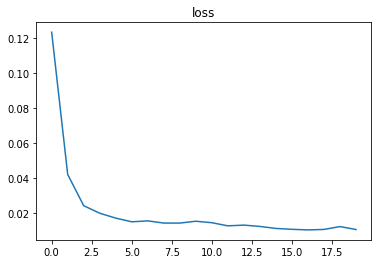

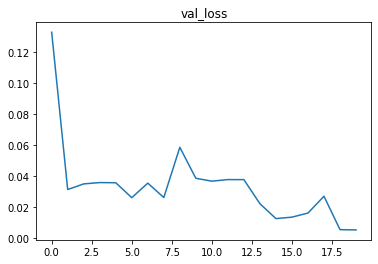

In [41]:
for key in history.history.keys():
  plt.plot(history.history[key])
  plt.title(key)
  plt.show();

**MINI CHALLENGE #5:**
- **Test the pipeline with at least 3 other stocks** 
- **Experiment with various LSTM model parameters (Ex: Use 150 units instead of 50), print out the model summary and retrain the model**


In [42]:
stock_name = 'AAPL'
# Let's prepare the data
price_volume_target_df = trading_window(individual_stock(stock_price_df, stock_vol_df, stock_name))
X, y, X_train, y_train, X_test, y_test = scaling_and_splitting_data(price_volume_target_df, split_percent=0.7)

# Let's find the best model
metrics = None # ['accuracy', 'mae','mse','mape']
best_score = 0
best_df_predicted = best_lstm = None
for lstm in [130, 140, 150, 160, 170]:
  model, score, predicted_prices, df_predicted, history = prices_keras_predictions(X_train, y_train,
                                                                                    X_test, y_test,
                                                                                    X,
                                                                                    price_volume_target_df.index,
                                                                                    lstm=lstm, metrics=metrics, verbose=0, seed=191)
  if score > best_score:
    best_score, best_df_predicted, best_lstm = score, df_predicted, lstm

# Let's present the best model
interactive_plot(best_df_predicted, f"Original Vs Prediction ({stock_name}, LSTM={best_lstm})")

Keras model r2 score: 0.9522721722131753
Keras model r2 score: 0.9335375121151852
Keras model r2 score: 0.8919529336857859
Keras model r2 score: 0.9463822011442395
Keras model r2 score: 0.963256233373001


In [43]:
stock_name = 'AMZN'
# Let's prepare the data
price_volume_target_df = trading_window(individual_stock(stock_price_df, stock_vol_df, stock_name))
X, y, X_train, y_train, X_test, y_test = scaling_and_splitting_data(price_volume_target_df, split_percent=0.7)

# Let's find the best model
metrics = None # ['accuracy', 'mae','mse','mape']
best_score = 0
best_df_predicted = best_lstm = None
for lstm in [130, 140, 150, 160, 170]:
  model, score, predicted_prices, df_predicted, history = prices_keras_predictions(X_train, y_train,
                                                                                    X_test, y_test,
                                                                                    X,
                                                                                    price_volume_target_df.index,
                                                                                    lstm=lstm, metrics=metrics, verbose=0, seed=191)
  if score > best_score:
    best_score, best_df_predicted, best_lstm = score, df_predicted, lstm

# Let's present the best model
interactive_plot(best_df_predicted, f"Original Vs Prediction ({stock_name}, LSTM={best_lstm})")

Keras model r2 score: 0.8666343160648566
Keras model r2 score: 0.8436734931251033
Keras model r2 score: 0.9027172936322028
Keras model r2 score: 0.7261179548759333
Keras model r2 score: 0.9496712110188226


In [44]:
stock_name = 'IBM'
# Let's prepare the data
price_volume_target_df = trading_window(individual_stock(stock_price_df, stock_vol_df, stock_name))
X, y, X_train, y_train, X_test, y_test = scaling_and_splitting_data(price_volume_target_df, split_percent=0.7)

# Let's find the best model
metrics = None # ['accuracy', 'mae','mse','mape']
best_score = 0
best_df_predicted = best_lstm = None
for lstm in [130, 140, 150, 160, 170]:
  model, score, predicted_prices, df_predicted, history = prices_keras_predictions(X_train, y_train,
                                                                                    X_test, y_test,
                                                                                    X,
                                                                                    price_volume_target_df.index,
                                                                                    lstm=lstm, metrics=metrics, verbose=0, seed=191)
  if score > best_score:
    best_score, best_df_predicted, best_lstm = score, df_predicted, lstm

# Let's present the best model
interactive_plot(best_df_predicted, f"Original Vs Prediction ({stock_name}, LSTM={best_lstm})")

Keras model r2 score: 0.9257328323606243
Keras model r2 score: 0.9135125093778195
Keras model r2 score: 0.9313880495412741
Keras model r2 score: 0.9236042764605994
Keras model r2 score: 0.9211226807060822


# **EXCELLENT JOB! YOU SHOULD BE TRULY PROUD WITH THE NEWLY ACQUIRED SKILLS**

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:**
- **What is the average trading volume for Apple stock?**
- **What is the maximum trading volume for sp500?**
- **Which security is traded the most? comment on your answer**
- **What is the average stock price of the S&P500 over the specified time period?**
- **What is the maximum price of Tesla Stock?**

In [45]:
# Get the statistical data for the stocks volume dataframe
# Average trading volume for Apple stock is 2.498238e+06	
# Average trading volume for S&P500 is 3.680732e+09

# Why S&P500 is the most traded of all? Check out this article: 
# https://www.investopedia.com/articles/personal-finance/022216/put-10000-sp-500-etf-and-wait-20-years.asp

# Text from the article above:
# "The S&P 500 index is a broad-based measure of large corporations traded on U.S. stock markets. Over long periods of time, 
# passively holding the index often produces better results than actively trading or picking single stocks.
# Over long-time horizons, the index typically produces better returns than actively managed portfolios."

stock_vol_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,"2,159.0000","2,159.0000","2,159.0000","2,159.0000","2,159.0000","2,159.0000","2,159.0000","2,159.0000","2,159.0000"
mean,"58,203,317.4155","6,419,915.9333","28,321,313.5711","9,845,581.7045","4,102,672.9041","4,453,089.5322","7,001,302.2696","2,498,238.2585","3,680,732,468.7355"
std,"45,681,411.9012","9,711,873.1540","14,289,105.8976","7,295,752.6435","2,290,722.3372","2,462,811.4478","5,781,207.8365","1,928,407.2520","862,271,696.8442"
min,"11,362,000.0000","788,900.0000","6,862,400.0000","950,700.0000","881,300.0000","1,193,000.0000","364,900.0000","7,900.0000","1,248,960,000.0000"
25%,"27,699,300.0000","3,031,850.0000","20,021,500.0000","5,796,450.0000","2,675,700.0000","3,111,250.0000","3,433,450.0000","1,325,400.0000","3,211,890,000.0000"
50%,"42,094,200.0000","3,991,000.0000","24,859,300.0000","7,899,800.0000","3,494,800.0000","3,825,000.0000","5,581,100.0000","1,813,900.0000","3,526,890,000.0000"
75%,"71,824,800.0000","5,325,900.0000","32,105,650.0000","11,040,550.0000","4,768,150.0000","4,937,300.0000","8,619,550.0000","3,245,350.0000","3,933,290,000.0000"
max,"376,530,000.0000","103,212,800.0000","195,082,700.0000","90,098,200.0000","23,856,100.0000","30,490,200.0000","60,938,800.0000","24,977,900.0000","9,044,690,000.0000"


In [46]:
# Get the statistical data for the prices dataframe
stock_price_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,"2,159.0000","2,159.0000","2,159.0000","2,159.0000","2,159.0000","2,159.0000","2,159.0000","2,159.0000","2,159.0000"
mean,140.8198,189.9427,35.1629,23.1057,915.6657,161.8530,259.6008,783.7125,"2,218.7496"
std,70.8276,103.6786,3.2075,6.9638,697.8389,25.5619,210.9880,334.4481,537.3217
min,55.7900,67.2400,26.7700,7.1400,175.9300,94.7700,22.7900,278.4812,"1,278.0400"
25%,89.1657,124.0150,33.0400,18.5450,316.4900,142.7700,184.5950,527.2144,"1,847.9850"
50%,116.6000,142.4200,34.9300,23.7800,676.0100,156.9500,231.9600,737.6000,"2,106.6299"
75%,175.0200,297.0450,37.4200,28.4300,"1,593.6450",185.9750,307.3500,"1,079.7450","2,705.8101"
max,455.6100,440.6200,43.4700,38.0300,"3,225.0000",215.8000,"1,643.0000","1,568.4900","3,386.1499"


In [47]:
# Average price for S&P500 = 2218.749554
# Maximum Tesla Price = 1643.000000

**MINI CHALLENGE #2 SOLUTION:**
- **Plot the normalized stock prices and volume dataset.**

In [48]:
# # Plot interactive chart for volume data
# # Notice that S&P500 trading is orders of magnitude compared to individual stocks
# interactive_plot(stock_vol_df, 'Stocks Volume')

In [49]:
# # plot interactive chart for normalized stocks prices data
# interactive_plot(normalize(stock_price_df), 'Stock Prices')

# # Let's normalize the data and re-plot interactive chart for volume data
# interactive_plot(normalize(stock_vol_df), 'Normalized Volume')

**MINI CHALLENGE #3 SOLUTION:**
- **Test the pipeline with S&P500 and AMZN datasets instead of AAPL**

In [50]:
# Let's test the functions and get individual stock prices and volumes for S&P500
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

,Close,Volume
Date,,
2012-01-12,"1,295.5000",4019890000
2012-01-13,"1,289.0900",3692370000
2012-01-17,"1,293.6700",4010490000
2012-01-18,"1,308.0400",4096160000
2012-01-19,"1,314.5000",4465890000
...,...,...
2020-08-05,"3,327.7700",4732220000
2020-08-06,"3,349.1599",4267490000
2020-08-07,"3,351.2800",4104860000


In [51]:
# Let's test the functions and get individual stock prices and volumes for Amazon 
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AMZN')
price_volume_df

,Close,Volume
Date,,
2012-01-12,175.9300,5385800
2012-01-13,178.4200,4753500
2012-01-17,181.6600,5644500
2012-01-18,189.4400,7473500
2012-01-19,194.4500,7096000
...,...,...
2020-08-05,"3,205.0300",3930000
2020-08-06,"3,225.0000",3940600
2020-08-07,"3,167.4600",3929600


**MINI CHALLENGE #4 SOLUTION:**
- **Experiment with various regularization value for alpha** 
- **What is the impact of increasing alpha?**
- **Note: default value for alpha is = 1**

In [52]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge(alpha = 2)
regression_model.fit(X_train, y_train)

Ridge(alpha=2)

**MINI CHALLENGE #5 SOLUTION:**
- **Test the pipeline with at least 3 other stocks** 
- **Experiment with various LSTM model parameters (Ex: Use 150 units instead of 50), print out the model summary and retrain the model**



In [53]:
# Create the model
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 2, 1)]            0         
                                                                 
 lstm_48 (LSTM)              (None, 2, 150)            91200     
                                                                 
 dropout_32 (Dropout)        (None, 2, 150)            0         
                                                                 
 lstm_49 (LSTM)              (None, 2, 150)            180600    
                                                                 
 dropout_33 (Dropout)        (None, 2, 150)            0         
                                                                 
 lstm_50 (LSTM)              (None, 150)               180600    
                                                                 
 dense_16 (Dense)            (None, 1)                 151